## Fixed effects

## EX1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

df = pd.read_csv("https://media.githubusercontent.com/media/nickeubank/MIDS_Data/master/us_driving_fatalities.csv")
df.head()

,Unnamed: 0,state,year,spirits,unemp,income,emppop,beertax,baptist,mormon,...,nfatal2124,afatal,pop,pop1517,pop1820,pop2124,milestot,unempus,emppopus,gsp
0,1,al,1982,1.37,14.4,10544.152344,50.692039,1.539379,30.355700,0.32829,...,32,309.437988,3942002.25,208999.593750,221553.43750,290000.06250,28516.0,9.7,57.799999,-0.022125
1,2,al,1983,1.36,13.7,10732.797852,52.147030,1.788991,30.333599,0.34341,...,35,341.834015,3960008.00,202000.078125,219125.46875,290000.15625,31032.0,9.6,57.900002,0.046558
2,3,al,1984,1.32,11.1,11108.791016,54.168087,1.714286,30.311501,0.35924,...,34,304.872009,3988991.75,196999.968750,216724.09375,288000.15625,32961.0,7.5,59.500004,0.062798
3,4,al,1985,1.28,8.9,11332.626953,55.271137,1.652542,30.289499,0.37579,...,45,276.742004,4021007.75,194999.734375,214349.03125,284000.31250,35091.0,7.2,60.100002,0.027490
4,5,al,1986,1.23,9.8,11661.506836,56.514496,1.609907,30.267401,0.39311,...,29,360.716003,4049993.75,203999.890625,212000.00000,263000.28125,36259.0,7.0,60.700001,0.032143


In [2]:
df.groupby("year").count()

,Unnamed: 0,state,spirits,unemp,income,emppop,beertax,baptist,mormon,drinkage,...,nfatal2124,afatal,pop,pop1517,pop1820,pop2124,milestot,unempus,emppopus,gsp
year,,,,,,,,,,,,,,,,,,,,,
1982,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
1983,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
1984,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
1985,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
1986,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
1987,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
1988,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48


In [3]:
num_state = len(df.groupby("state"))

print(f"this dataframe contains {num_state} states, and the time frame is 1982 - 1988, a single observation is the condition of each state in each year.")

this dataframe contains 48 states, and the time frame is 1982 - 1988, a single observation is the condition of each state in each year.


## EX2

In [4]:
df["fat_rate"] = df["fatal"]/df["pop"] * 10000
df

,Unnamed: 0,state,year,spirits,unemp,income,emppop,beertax,baptist,mormon,...,afatal,pop,pop1517,pop1820,pop2124,milestot,unempus,emppopus,gsp,fat_rate
0,1,al,1982,1.37,14.4,10544.152344,50.692039,1.539379,30.355700,0.32829,...,309.437988,3.942002e+06,208999.593750,221553.437500,290000.062500,28516.0,9.7,57.799999,-0.022125,2.12836
1,2,al,1983,1.36,13.7,10732.797852,52.147030,1.788991,30.333599,0.34341,...,341.834015,3.960008e+06,202000.078125,219125.468750,290000.156250,31032.0,9.6,57.900002,0.046558,2.34848
2,3,al,1984,1.32,11.1,11108.791016,54.168087,1.714286,30.311501,0.35924,...,304.872009,3.988992e+06,196999.968750,216724.093750,288000.156250,32961.0,7.5,59.500004,0.062798,2.33643
3,4,al,1985,1.28,8.9,11332.626953,55.271137,1.652542,30.289499,0.37579,...,276.742004,4.021008e+06,194999.734375,214349.031250,284000.312500,35091.0,7.2,60.100002,0.027490,2.19348
4,5,al,1986,1.23,9.8,11661.506836,56.514496,1.609907,30.267401,0.39311,...,360.716003,4.049994e+06,203999.890625,212000.000000,263000.281250,36259.0,7.0,60.700001,0.032143,2.66914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,332,wy,1984,1.91,6.3,13456.043945,66.022095,0.049451,2.630720,8.55593,...,62.278999,5.129998e+05,21999.941406,24821.398438,36999.839844,5127.0,7.5,59.500004,-0.016678,3.06043
332,333,wy,1985,1.88,7.1,13595.338867,65.083801,0.047669,2.720570,8.54494,...,52.345001,5.089996e+05,22000.021484,24407.244141,35000.218750,5401.0,7.2,60.100002,-0.012126,2.98625
333,334,wy,1986,1.70,9.0,13126.934570,63.966484,0.046440,2.813500,8.53397,...,57.856998,5.069999e+05,23000.005859,23999.998047,34999.789062,5384.0,7.0,60.700001,-0.109976,3.31361
334,335,wy,1987,1.59,8.6,12719.000000,62.857143,0.045000,2.909600,8.52302,...,35.500000,4.900005e+05,22000.021484,22999.916016,32999.671875,5367.0,6.2,61.500000,-0.123641,2.63265


## EX3

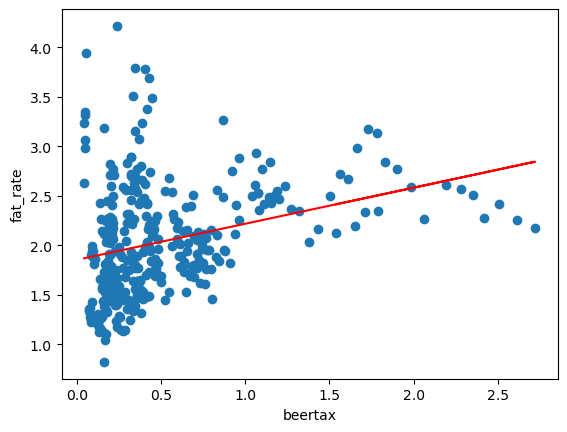

In [5]:
plt.scatter(df.beertax, df.fat_rate)
plt.xlabel("beertax")
plt.ylabel("fat_rate")
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(df.beertax, df.fat_rate,1)
#add linear regression line to scatterplot 
plt.plot(df.beertax, m*df.beertax+b,"red")
plt.show()

## EX4

In [6]:
model = smf.ols("fat_rate ~ beertax", df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               fat_rate   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     34.39
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           1.08e-08
Time:                        20:25:22   Log-Likelihood:                -271.04
No. Observations:                 336   AIC:                             546.1
Df Residuals:                     334   BIC:                             553.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8533      0.044     42.539      0.000       1.768       1.939
beertax        0.3646      0.062      5.865      0.000       0.242       0.487
==============================================================================
Omnibus:                       66.653   Durbin-Watson:                   0.465
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.734
Skew:                           1.134   Prob(JB):                     3.31e-25
Kurtosis:                       4.707   Cond. No.                         2.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our result shows that since p value <0.000, we have significant evidence that as beertax increase by 1 unit, the fat_rate will increase by 0.3646 unit.

## EX5

In [7]:
model = smf.ols("fat_rate ~ C(beertax)", df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               fat_rate   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     1.688
Date:                Mon, 27 Feb 2023   Prob (F-statistic):             0.0331
Time:                        20:25:23   Log-Likelihood:                 177.69
No. Observations:                 336   AIC:                             248.6
Df Residuals:                      34   BIC:                             1401.
Df Model:                         301                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            3.2359      0.448      7.219      0.000       2.325       4.147
C(beertax)[T.0.0450000017881393]    -0.6033      0.634     -0.952      0.348      -1.892       0.685
C(beertax)[T.0.0464396290481091]     0.0777      0.634      0.123      0.903      -1.211       1.366
C(beertax)[T.0.047669492661953]     -0.2497      0.634     -0.394      0.696      -1.538       1.039
C(beertax)[T.0.0494505502283573]    -0.1755      0.634     -0.277      0.784      -1.464       1.113
C(beertax)[T.0.0516055077314377]     0.1168      0.634      0.184      0.855      -1.171       1.405
C(beertax)[T.0.0536992847919464]     0.7053      0.634      1.113      0.274      -0.583       1.994
C(beertax)[T.0.072184793651104]     -1.8747      0.634     -2.957      0.006      -3.163      -0.586
C(beertax)[T.0.0750000029802322]    -1.9025      0.634     -3.001      0.005      -3.191      -0.614
C(beertax)[T.0.077399380505085]     -1.8733      0.634     -2.955      0.006      -3.162      -0.585
C(beertax)[T.0.0794491544365883]    -1.9611      0.634     -3.094      0.004      -3.249      -0.673
C(beertax)[T.0.0824175849556923]    -2.0094      0.634     -3.170      0.003      -3.298      -0.721
C(beertax)[T.0.0860091745853424]    -1.9879      0.634     -3.136      0.004      -3.276      -0.700
C(beertax)[T.0.0866217538714409]    -1.3323      0.634     -2.102      0.043      -2.621      -0.044
C(beertax)[T.0.0894988104701042]    -1.8079      0.634     -2.852      0.007      -3.096      -0.520
C(beertax)[T.0.0900000035762787]    -1.2463      0.634     -1.966      0.058      -2.535       0.042
C(beertax)[T.0.0928792580962181]    -1.2904      0.634     -2.036      0.050      -2.579      -0.002
C(beertax)[T.0.0953389853239059]    -1.3546      0.634     -2.137      0.040      -2.643      -0.066
C(beertax)[T.0.0989011004567146]    -1.2898      0.634     -2.035      0.050      -2.578      -0.002
C(beertax)[T.0.103211015462875]     -1.4292      0.634     -2.255      0.031      -2.717      -0.141
C(beertax)[T.0.107398569583893]     -1.3740      0.634     -2.167      0.037      -2.662      -0.086
C(beertax)[T.0.11911453306675]      -1.9768      0.634     -3.118      0.004      -3.265      -0.688
C(beertax)[T.0.119331747293472]     -2.0066      0.634     -3.165      0.003      -3.295      -0.718
C(beertax)[T.0.123759999871254]     -1.9271      0.634     -3.040      0.005      -3.215      -0.639
C(beertax)[T.0.127719298005104]     -2.0434      0.634     -3.224      0.003      -3.332      -0.755
C(beertax)[T.0.131101697683334]     -2.1079      0.634     -3.325      0.002      -3.396      -0.820
C(beertax)[T.0.132855504751205]     -2.0615      0.634     -3.252      0.003      -3.350      -0.773
C(beertax)[T.0.135999992489815]     -2.0751      0.63

As we can see for states (and at the year) where beertax is extremely high and extremely low, the beertaxs are not significant factors of fat_rate. This implies that these observations are outliers of regression model.

## EX6

Our result in EX4 without fixed effects implies that for all states from year 1982-1988 beertax is a significant predictive variable (factor) of fatal rate; as a comparison, our result in EX5 with fixed effects implies that for those states who have very high or very low beertaxes, they don't follow the discipline found in our regression. We guess for those high-beertax states a high beertax implement has successfully affected their fatal rate. Or, the previous guess may not be true, but the regression cannot faithfully reflect the trends in high-beertax states.

## EX6

In [8]:
# groupby_state = df.groupby(["state","year"])
state_list = list(df.state.unique())
fat = []
beertax = []
for i in state_list:
    temp_ = df.loc[df.state == i]
    b_list = (temp_.beertax - temp_.beertax.mean()).tolist()
    f_list = (temp_.fat_rate - temp_.fat_rate.mean()).tolist()
    for j in b_list:
        beertax.append(j)
    for k in f_list:
        fat.append(k)
# fat

In [9]:
df1 = pd.DataFrame({"fat":fat, "beertax":beertax})
model = smf.ols("fat ~ beertax", df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    fat   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     14.19
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           0.000196
Time:                        20:25:23   Log-Likelihood:                 107.97
No. Observations:                 336   AIC:                            -211.9
Df Residuals:                     334   BIC:                            -204.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.648e-17      0.010  -1.72e-15      1.000      -0.019       0.019
beertax       -0.6559      0.174     -3.767      0.000      -0.998      -0.313
==============================================================================
Omnibus:                       53.045   Durbin-Watson:                   1.517
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.863
Skew:                           0.585   Prob(JB):                     1.81e-48
Kurtosis:                       6.786   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our result shows that since p value <0.000, we have significant evidence that as beertax increase by 1 unit, the fat_rate will decrease by 0.6559 unit.

## EX7

In [10]:
df1

,fat,beertax
0,-0.284267,-0.084413
1,-0.064147,0.165198
2,-0.076197,0.090493
3,-0.219147,0.028750
4,0.256513,-0.013886
...,...,...
331,-0.157104,0.001283
332,-0.231284,-0.000498
333,0.096076,-0.001728
334,-0.584884,-0.003168


In [11]:
# Create DataFrame with a 2-level MultiIndex
index = pd.MultiIndex.from_arrays([df["state"],df["year"]])
# index
data = df.set_index(index)
# data = data.drop(["state","year"],axis = 1)
data

Unnamed: 0 state  year  spirits  unemp        income     emppop  \
state year                                                                    
al    1982           1    al  1982     1.37   14.4  10544.152344  50.692039   
      1983           2    al  1983     1.36   13.7  10732.797852  52.147030   
      1984           3    al  1984     1.32   11.1  11108.791016  54.168087   
      1985           4    al  1985     1.28    8.9  11332.626953  55.271137   
      1986           5    al  1986     1.23    9.8  11661.506836  56.514496   
...                ...   ...   ...      ...    ...           ...        ...   
wy    1984         332    wy  1984     1.91    6.3  13456.043945  66.022095   
      1985         333    wy  1985     1.88    7.1  13595.338867  65.083801   
      1986         334    wy  1986     1.70    9.0  13126.934570  63.966484   
      1987         335    wy  1987     1.59    8.6  12719.000000  62.857143   
      1988         336    wy  1988     1.55    6.3  13098.170898  64.637680   

             beertax    baptist   mormon  ...      afatal           pop  \
state year                                ...                             
al    1982  1.539379  30.355700  0.32829  ...  309.437988  3.942002e+06   
      1983  1.788991  30.333599  0.34341  ...  341.834015  3.960008e+06   
      1984  1.714286  30.311501  0.35924  ...  304.872009  3.988992e+06   
      1985  1.652542  30.289499  0.37579  ...  276.742004  4.021008e+06   
      1986  1.609907  30.267401  0.39311  ...  360.716003  4.049994e+06   
...              ...        ...      ...  ...         ...           ...   
wy    1984  0.049451   2.630720  8.55593  ...   62.278999  5.129998e+05   
      1985  0.047669   2.720570  8.54494  ...   52.345001  5.089996e+05   
      1986  0.046440   2.813500  8.53397  ...   57.856998  5.069999e+05   
      1987  0.045000   2.909600  8.52302  ...   35.500000  4.900005e+05   
      1988  0.043311   3.008990  8.51208  ...   47.422001  4.789997e+05   

                  pop1517        pop1820        pop2124 milestot unempus  \
state year                                                                 
al    1982  208999.593750  221553.437500  290000.062500  28516.0     9.7   
      1983  202000.078125  219125.468750  290000.156250  31032.0     9.6   
      1984  196999.968750  216724.093750  288000.156250  32961.0     7.5   
      1985  194999.734375  214349.031250  284000.312500  35091.0     7.2   
      1986  203999.890625  212000.000000  263000.281250  36259.0     7.0   
...                   ...            ...            ...      ...     ...   
wy    1984   21999.941406   24821.398438   36999.839844   5127.0     7.5   
      1985   22000.021484   24407.244141   35000.218750   5401.0     7.2   
      1986   23000.005859   23999.998047   34999.789062   5384.0     7.0   
      1987   22000.021484   22999.916016   32999.671875   5367.0     6.2   
      1988   21000.021484   20999.962891   30000.156250   5658.0     5.5   

             emppopus       gsp  fat_rate  
state year                                 
al    1982  57.799999 -0.022125   2.12836  
      1983  57.900002  0.046558   2.34848  
      1984  59.500004  0.062798   2.33643  
      1985  60.100002  0.027490   2.19348  
      1986  60.700001  0.032143   2.66914  
...               ...       ...       ...  
wy    1984  59.500004 -0.016678   3.06043  
      1985  60.100002 -0.012126   2.98625  
      1986  60.700001 -0.109976   3.31361  
      1987  61.500000 -0.123641   2.63265  
      1988  62.300003 -0.017023   3.23591  

[336 rows x 36 columns]

In [12]:
from linearmodels.panel import PanelOLS
mod = PanelOLS(data['fat_rate'], data[['beertax']], entity_effects=True)
results = mod.fit(cov_type='clustered', cluster_entity=True)
print(results.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:               fat_rate   R-squared:                        0.0407
Estimator:                   PanelOLS   R-squared (Between):             -0.3805
No. Observations:                 336   R-squared (Within):               0.0407
Date:                Mon, Feb 27 2023   R-squared (Overall):             -0.3775
Time:                        20:25:23   Log-likelihood                    107.97
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      12.190
Entities:                          48   P-value                           0.0006
Avg Obs:                       7.0000   Distribution:                   F(1,287)
Min Obs:                       7.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             5.1576
                            

Our PanelOLS conclusion is the same as our by-hand conclusion. However, the p-value of PanelOLS is higher than our by-hand fixed effect regression.
Our result shows that since p value <0.0239, we have significant evidence that with fixed effects as beertax increase by 1 unit, the fat_rate will decrease by 0.6559 unit.

## EX8

In [13]:
# # Create DataFrame with a 2-level MultiIndex
# index = pd.MultiIndex.from_arrays([df["state"],df["year"],df["breath"]])
# # index
# data = df.set_index(index)
# # data = data.drop(["state","year"],axis = 1)
# data

In [14]:
mod = PanelOLS(data['fat_rate'], data[['beertax','income']], entity_effects=True)
results = mod.fit(cov_type='clustered', cluster_entity=True)
print(results.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:               fat_rate   R-squared:                        0.0901
Estimator:                   PanelOLS   R-squared (Between):              0.3458
No. Observations:                 336   R-squared (Within):               0.0901
Date:                Mon, Feb 27 2023   R-squared (Overall):              0.3440
Time:                        20:25:23   Log-likelihood                    116.86
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      14.168
Entities:                          48   P-value                           0.0000
Avg Obs:                       7.0000   Distribution:                   F(2,286)
Min Obs:                       7.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             8.5768
                            

a) The type of phenomenon we control for by adding `year` fixed effects is phenomenon that most states adjust their beertax from year to year.  
b) I choose `income` as a covariate. By adding `year`, `state`,`income`, `beertax` fixed effects, we have significant evidence that as `income` increases by 1 unit, the fat_rate will increase by 5.158e-05 unit.